In [279]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# 1. Подготовка датасета 

In [280]:
df = pd.read_csv('data_carprice.zip')

#### Описание данных

- make — марка автомобиля (BMW, Toyota и т.д.);
- model — модель автомобиля;
- year — год выпуска автомобиля;
- engine_fuel_type — тип топлива, необходимого двигателю (дизельный, электрический и т.д.);
- engine_hp — мощность двигателя в лошадиных силах;
- engine_cylinders — количество цилиндров в двигателе;
- transmission_type — тип коробки передач (автоматическая или ручная);
- driven_wheels — привод (передний, задний, полный);
- number_of_doors — количество дверей в автомобиле;
- market_category — премиальный, кроссовер и т.д.;
- vehicle_size — компактный, средний или большой;
- vehicle_style — седан или кабриолет;
- highway_mpg — миль на галлон (miles per gallon, mpg) на шоссе;
- city_mpg — миль на галлон по городу;
- popularity — количество упоминаний автомобиля в Twitter;
- msrp — рекомендованная производителем розничная цена.

In [281]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


#### В наборе данных содержатся кое-какие несоответствия: имена столбцов иногда содержат пробелы, а иногда подчеркивания (_). Заменим их.

In [282]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [283]:
string_columns = list(df.dtypes[df.dtypes == 'object'].index)

In [284]:
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [285]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


# 2. Анализ целевых переменных

#### Построим гистрограмму целевой переменной
Распределение цен имеет очень длинный «хвост». В левой части много автомобилей с низкими ценами, но их количество быстро уменьшается, после чего остается длинный «хвост» из очень немногих автомобилей с высокими ценами

D:\Programs\Python\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


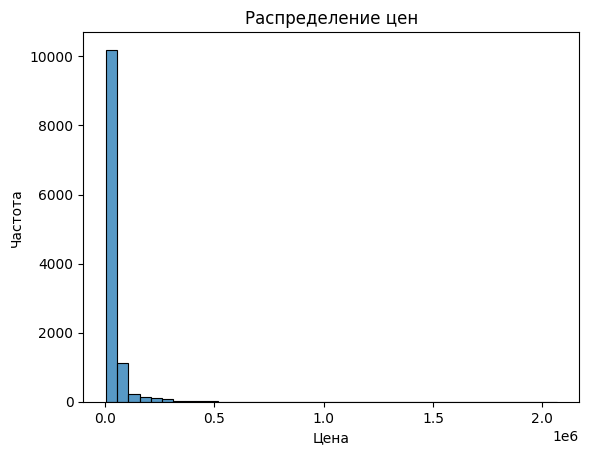

In [286]:
sns.histplot(df['msrp'], bins=40)
plt.ylabel('Частота')
plt.xlabel('Цена')
plt.title('Распределение цен')
plt.show()

#### Увеличим масштаб и отоберём значения ниже 100 000 долларов

D:\Programs\Python\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


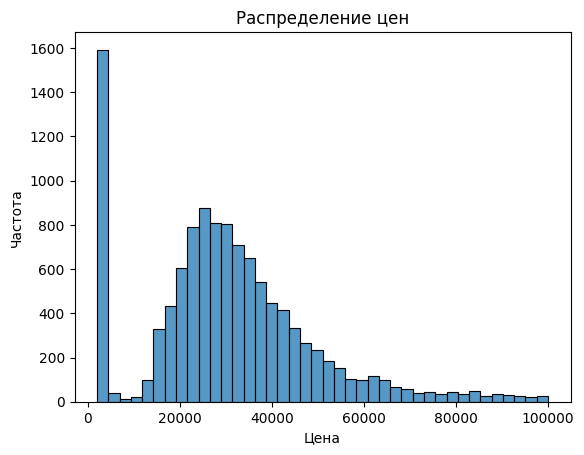

In [287]:
sns.histplot(df['msrp'][df['msrp']<100000], bins=40)
plt.ylabel('Частота')
plt.xlabel('Цена')
plt.title('Распределение цен')
plt.show()

#### Применим логарифмирование для удаления длинного "хвоста"
Данное преобразование удаляет длинный «хвост» и целевое распределение больше похоже на нормальное.

In [288]:
log_price = np.log1p(df.msrp)

D:\Programs\Python\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


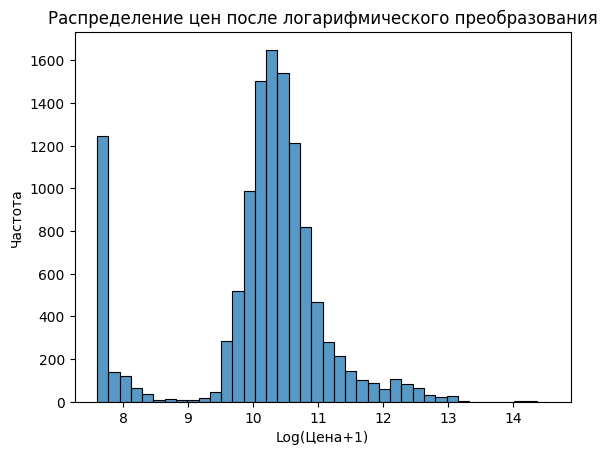

In [289]:
sns.histplot(log_price, bins=40)
plt.ylabel('Частота')
plt.xlabel('Log(Цена+1)')
plt.title('Распределение цен после логарифмического преобразования')
plt.show()

# 3. Исследовательский анализ данных

#### Посмотрим на количество пустых значений

In [290]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

<Axes: >

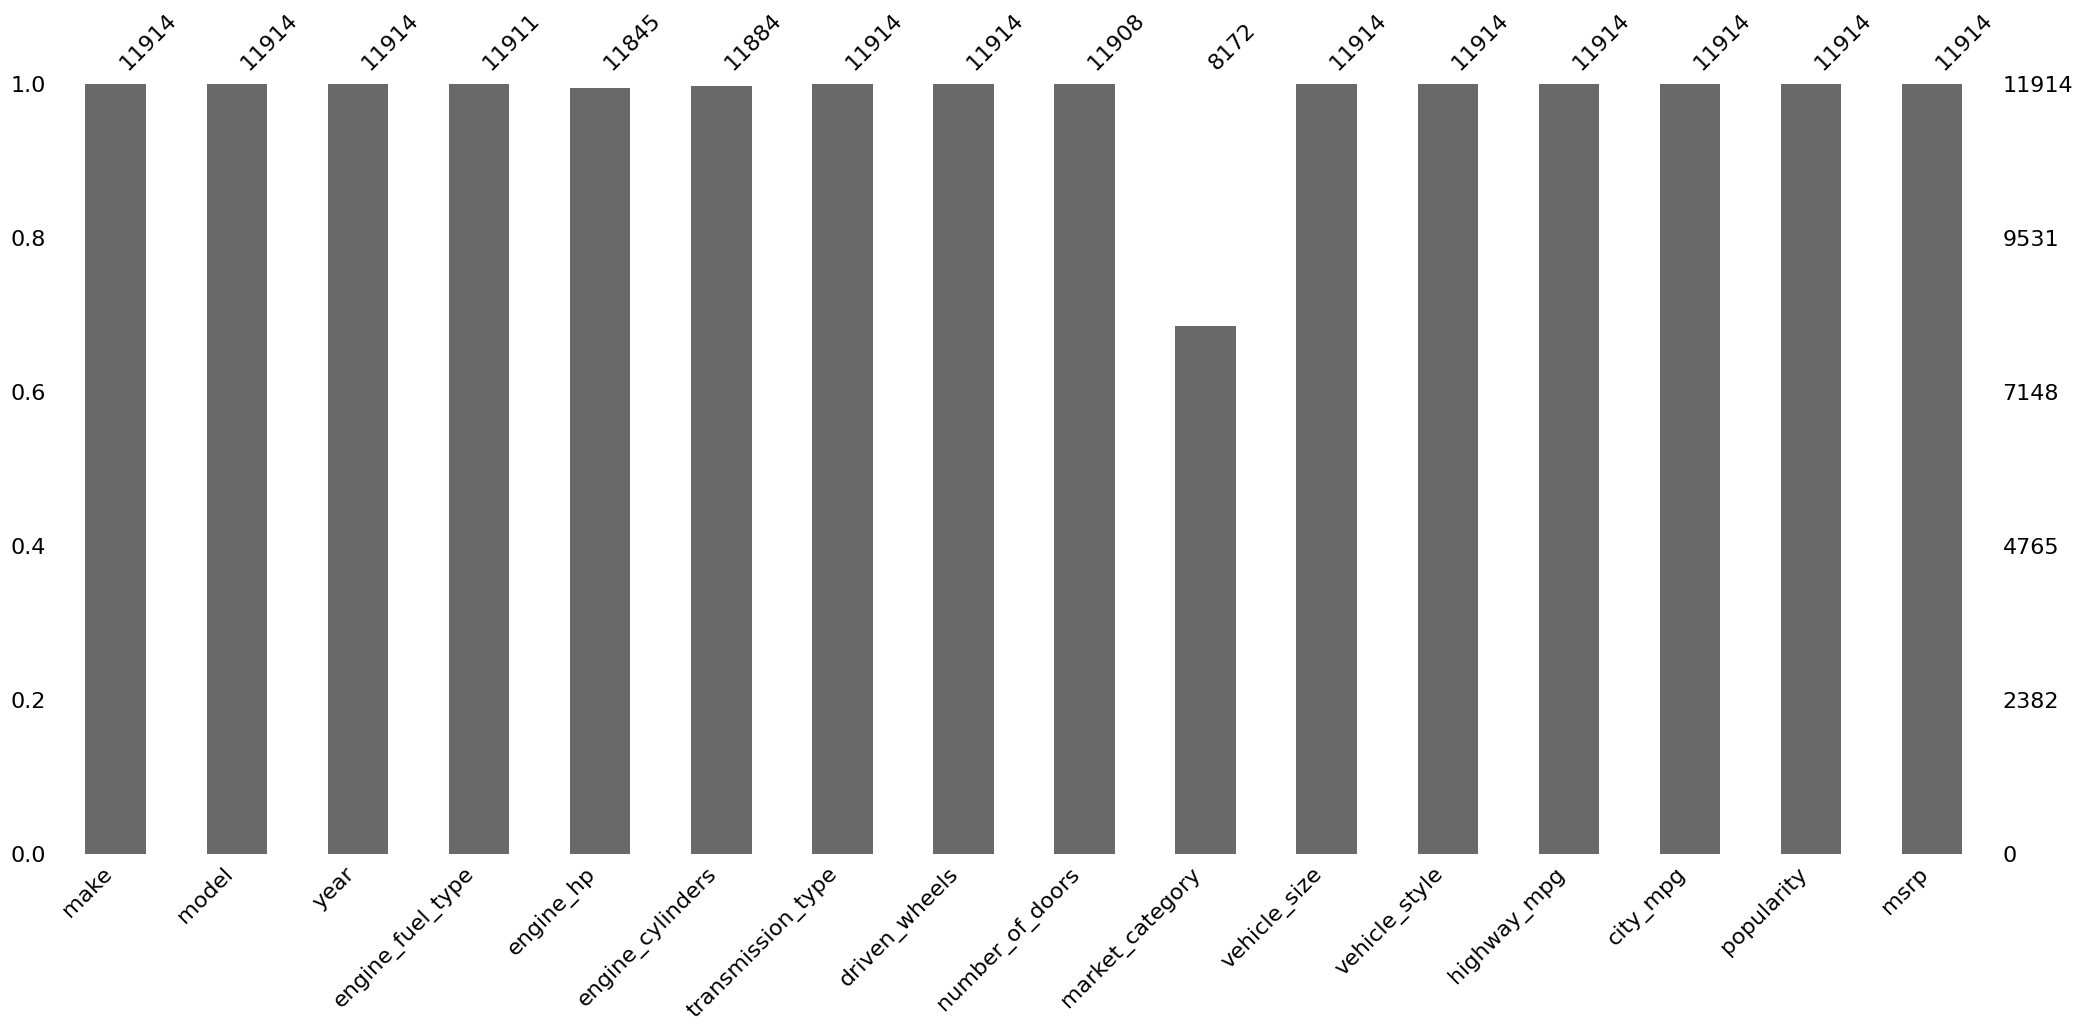

In [291]:
msno.bar(df)

#### Построим матрицу пропущенных значений

<Axes: >

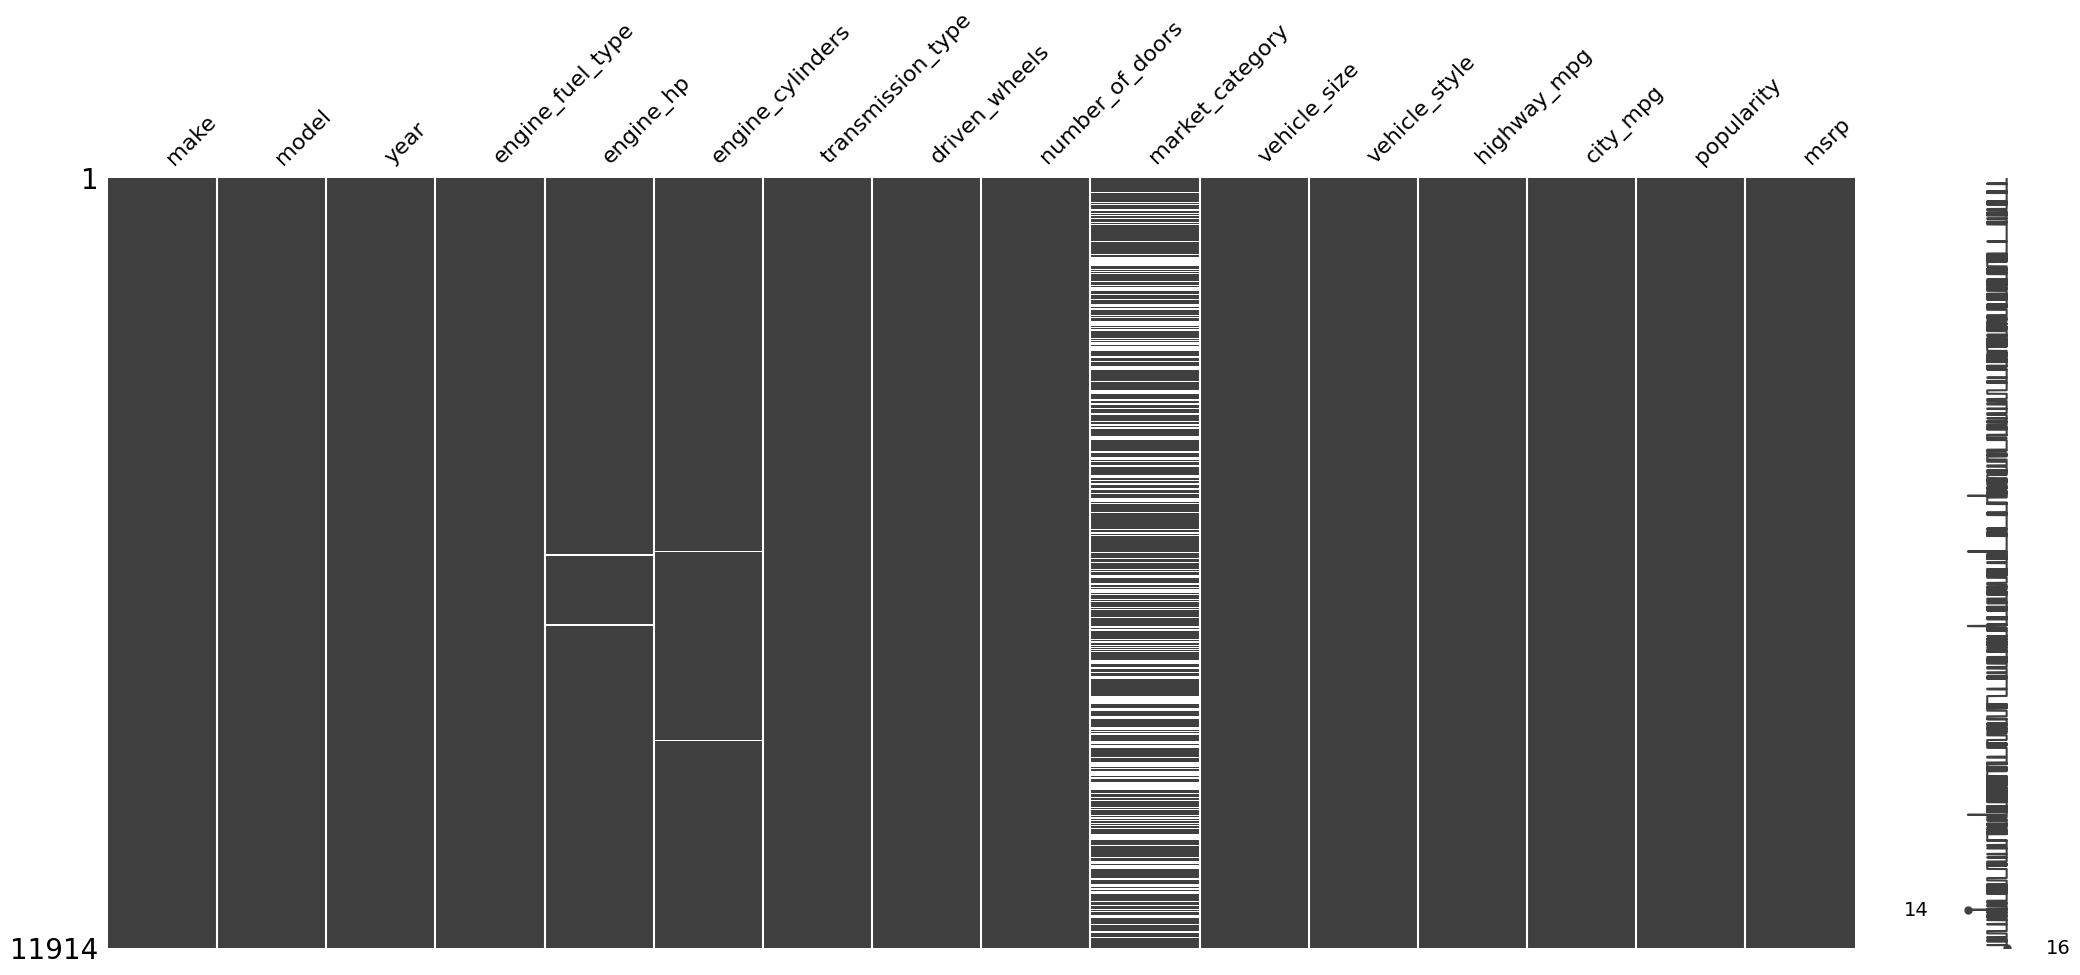

In [292]:
msno.matrix(df)

# 4. Подготовка системы проверки моделей машинного обучения

#### Разделим датафрейм таким образом, чтобы:
- 20 % данных шло на проверку;
- 20 % — на тестирование;
- остальные 60 % — на обучение 

In [293]:
n = len(df)

In [294]:
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = int(n_val + n_test)

In [295]:
np.random.seed(2)
idx = np.arange(n)
np.random.shuffle(idx)
df_shuffled = df.iloc[idx]

In [296]:
df_shuffled.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


#### Разделим перетасованный датафрейм на обучающий, проверочныйи тестовый наборы

In [297]:
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

#### Избавимся от длинного хвота в распределении цен

In [298]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

#### Чтобы избежать случайного использования целевой переменной в дальнейшем, удалим ее из датафреймов:

In [299]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

# 5. Машинное обучение для регрессии

#### Функция, реализующая линейную регрессию с помощью Numpy

In [300]:
def train_linear_regression(X, y):

    ones = np.ones(X.shape[0])

    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

#### Функция, реализующая линейную регрессию с регуляризацией с помощью Numpy

In [301]:
def train_linear_regression_reg(X, y, r=0.0):

    ones = np.ones(X.shape[0])

    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

#### Выберем признаки из датафрейма и запишем их в новую переменную df_num

In [302]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg','popularity']
df_num = df_train[base]
df_num.head()

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
2735,148.0,4.0,33,24,1385
6720,132.0,4.0,32,25,2031
5878,148.0,4.0,37,28,640
11190,90.0,4.0,18,16,873
4554,385.0,8.0,21,15,5657


#### В наборе данных отсутствуют некоторые значения. Заполним недостающие значения нулями

In [303]:
def prepare_X(df):

    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)

    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)

    for v in ['regular_unleaded', 'premium_unleaded_(required)','premium_unleaded_(recommended)', 
              'flex-fuel_(unleaded/e85)']:
        feature = 'is_type_%s' % v
        df[feature] = (df['engine_fuel_type'] == v).astype(int)
        features.append(feature)

    for v in ['automatic', 'manual', 'automated_manual']:
        feature = 'is_transmission_%s' % v
        df[feature] = (df['transmission_type'] == v).astype(int)
        features.append( feature)
    
    for v in ['front_wheel_drive', 'rear_wheel_drive', 'all_wheel_drive', 'four_wheel_drive']:
        feature = 'is_driven_wheels_%s' % v
        df[feature] = (df['driven_wheels'] == v).astype(int)
        features.append(feature)
    
    for v in ['crossover', 'flex_fuel', 'luxury', 'luxury,performance', 'hatchback']:
        feature = 'is_mc_%s' % v
        df[feature] = (df['market_category'] == v).astype(int)
        features.append(feature)
    
    for v in ['compact', 'midsize', 'large']:
        feature = 'is_size_%s' % v
        df[feature] = (df['vehicle_size'] == v).astype(int)
        features.append(feature)


    for v in ['sedan', '4dr_suv', 'coupe', 'convertible','4dr_hatchback']:
        feature = 'is_style_%s' % v
        df[feature] = (df['vehicle_style'] == v).astype(int)
        features.append(feature)
    
    df_num = df[features]    
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [304]:
X_train = prepare_X(df_train)

#### Обучаем модель

In [305]:
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.01)
print('%5s, %.2f, %.2f, %.2f' % (r, w_0, w[13], w[21]))

   10, 7.89, -0.09, 2.04


#### Выводим смещение

In [306]:
w_0

7.888526323872892

#### Выводим остальные коэффициенты

In [307]:
w

array([ 1.89311880e-03,  1.01692892e-01, -3.71054845e-02,  2.68020746e-02,
       -4.90926728e-05, -9.89418809e-02, -1.79347687e+00, -1.87355349e+00,
       -1.58638653e+00, -1.42170036e-02,  1.31429344e-01,  3.40308163e-02,
       -1.61342200e-01, -9.04813161e-02, -5.53664332e-01, -9.85139536e-03,
       -4.04364359e-01, -6.03605068e-01, -1.86329023e-01, -3.17368160e-01,
       -1.49995507e-01,  2.04056159e+00,  1.93681651e+00,  1.99833300e+00,
        1.91281452e+00, -3.32218757e-02,  4.08246703e-02, -4.47525702e-02,
       -4.35619546e-03,  9.14144651e-02,  2.70341551e+00,  2.60182440e+00,
        2.58328627e+00,  4.97654010e-03,  1.29136228e-02,  2.31499366e-01,
        3.94970009e-01, -1.91574755e-01])

#### Сделаем прогноз используя модель

In [308]:
y_pred = w_0 + X_train.dot(w)

#### Чтобы увидеть, насколько хороши прогнозы, построим гистограмму
Из графика видно, что распределение значений, которое мы предсказали, сильно отличается от фактических значений. Результат может указывать на то, что модель недостаточно эффективна,чтобы уловить распределение 
целевой переменной

D:\Programs\Python\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Programs\Python\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


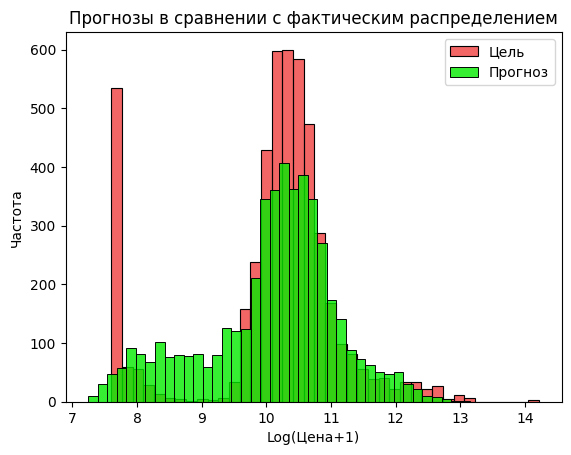

In [309]:
sns.histplot(y_train, label='Цель', color='#eb0000', alpha=0.6, bins=40)
sns.histplot(y_pred, label='Прогноз', color='#04eb00', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Частота')
plt.xlabel('Log(Цена+1)')
plt.title('Прогнозы в сравнении с фактическим распределением')

plt.show()

#### Оценим качество модели используя RMSE

In [310]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [311]:
rmse(y_train, y_pred)

0.46440114327286447

# 6. Проверка модели

In [312]:
X_val = prepare_X(df_val)

In [313]:
y_pred = w_0 + X_val.dot(w)

In [314]:
print(f'Validation: {rmse(y_val, y_pred)}')

Validation: 0.5209878279259019


In [315]:
X_test = prepare_X(df_test)
y_pred = w_0 + X_test.dot(w)
print(f'Test: {rmse(y_test, y_pred)}')

Test: 0.4562828389992389


# 7. Использование модели

In [316]:
dba={'make': 'toyota',
    'model': 'venza',
    'year': 2013,
    'engine_fuel_type': 'regular_unleaded',
    'engine_hp': 268.0,
    'engine_cylinders': 6.0,
    'transmission_type': 'automatic',
    'driven_wheels': 'all_wheel_drive',
    'number_of_doors': 4.0,
    'market_category': 'crossover,performance',
    'vehicle_size': 'midsize',
    'vehicle_style': 'wagon',
    'highway_mpg': 25,
    'city_mpg': 18,
    'popularity': 2031}

In [317]:
df_test = pd.DataFrame([dba])

In [318]:
X_test = prepare_X(df_test)

In [319]:
y_pred = w_0 + X_test.dot(w)

In [320]:
suggestion = np.expm1(y_pred)
suggestion

array([26311.52444908])